#### Create a pseudocolor plot of MPAS unstructured triangular grid.

From Michael Duda:
https://www2.mmm.ucar.edu/projects/mpas/tutorial/Howard2024/
plot_delta_sst.py


Ming Ge Feb 2025

**Modified for WCRP Hackathon by Julia Kukulies, May 2025** 


In [1]:
import xarray as xr
import numpy as np
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs 

In [5]:
dir_data = "/glade/campaign/mmm/wmr/fjudt/projects/dyamond_1/7.5km/"
flnm_grid = dir_data + "x1.10485762.static.nc"
flnm_data = dir_data + "x1.10485762.sfc_update.nc"

In [6]:
ds_i = xr.open_dataset(flnm_data)
sst = ds_i.sst[10] -  ds_i.sst[0]

# get latCell, lonCell
ds_i = xr.open_dataset(flnm_grid)
ds_i = ds_i.squeeze()

# Convert to degrees from radians¶
lonData = np.degrees(ds_i.lonCell)
latData = np.degrees(ds_i.latCell)

# convert lonData to range [-180, 180]
lonData = ((lonData + 180) % 360) - 180

triang = tri.Triangulation(lonData, latData)

CPU times: user 3min 21s, sys: 8.68 s, total: 3min 29s
Wall time: 11min 40s


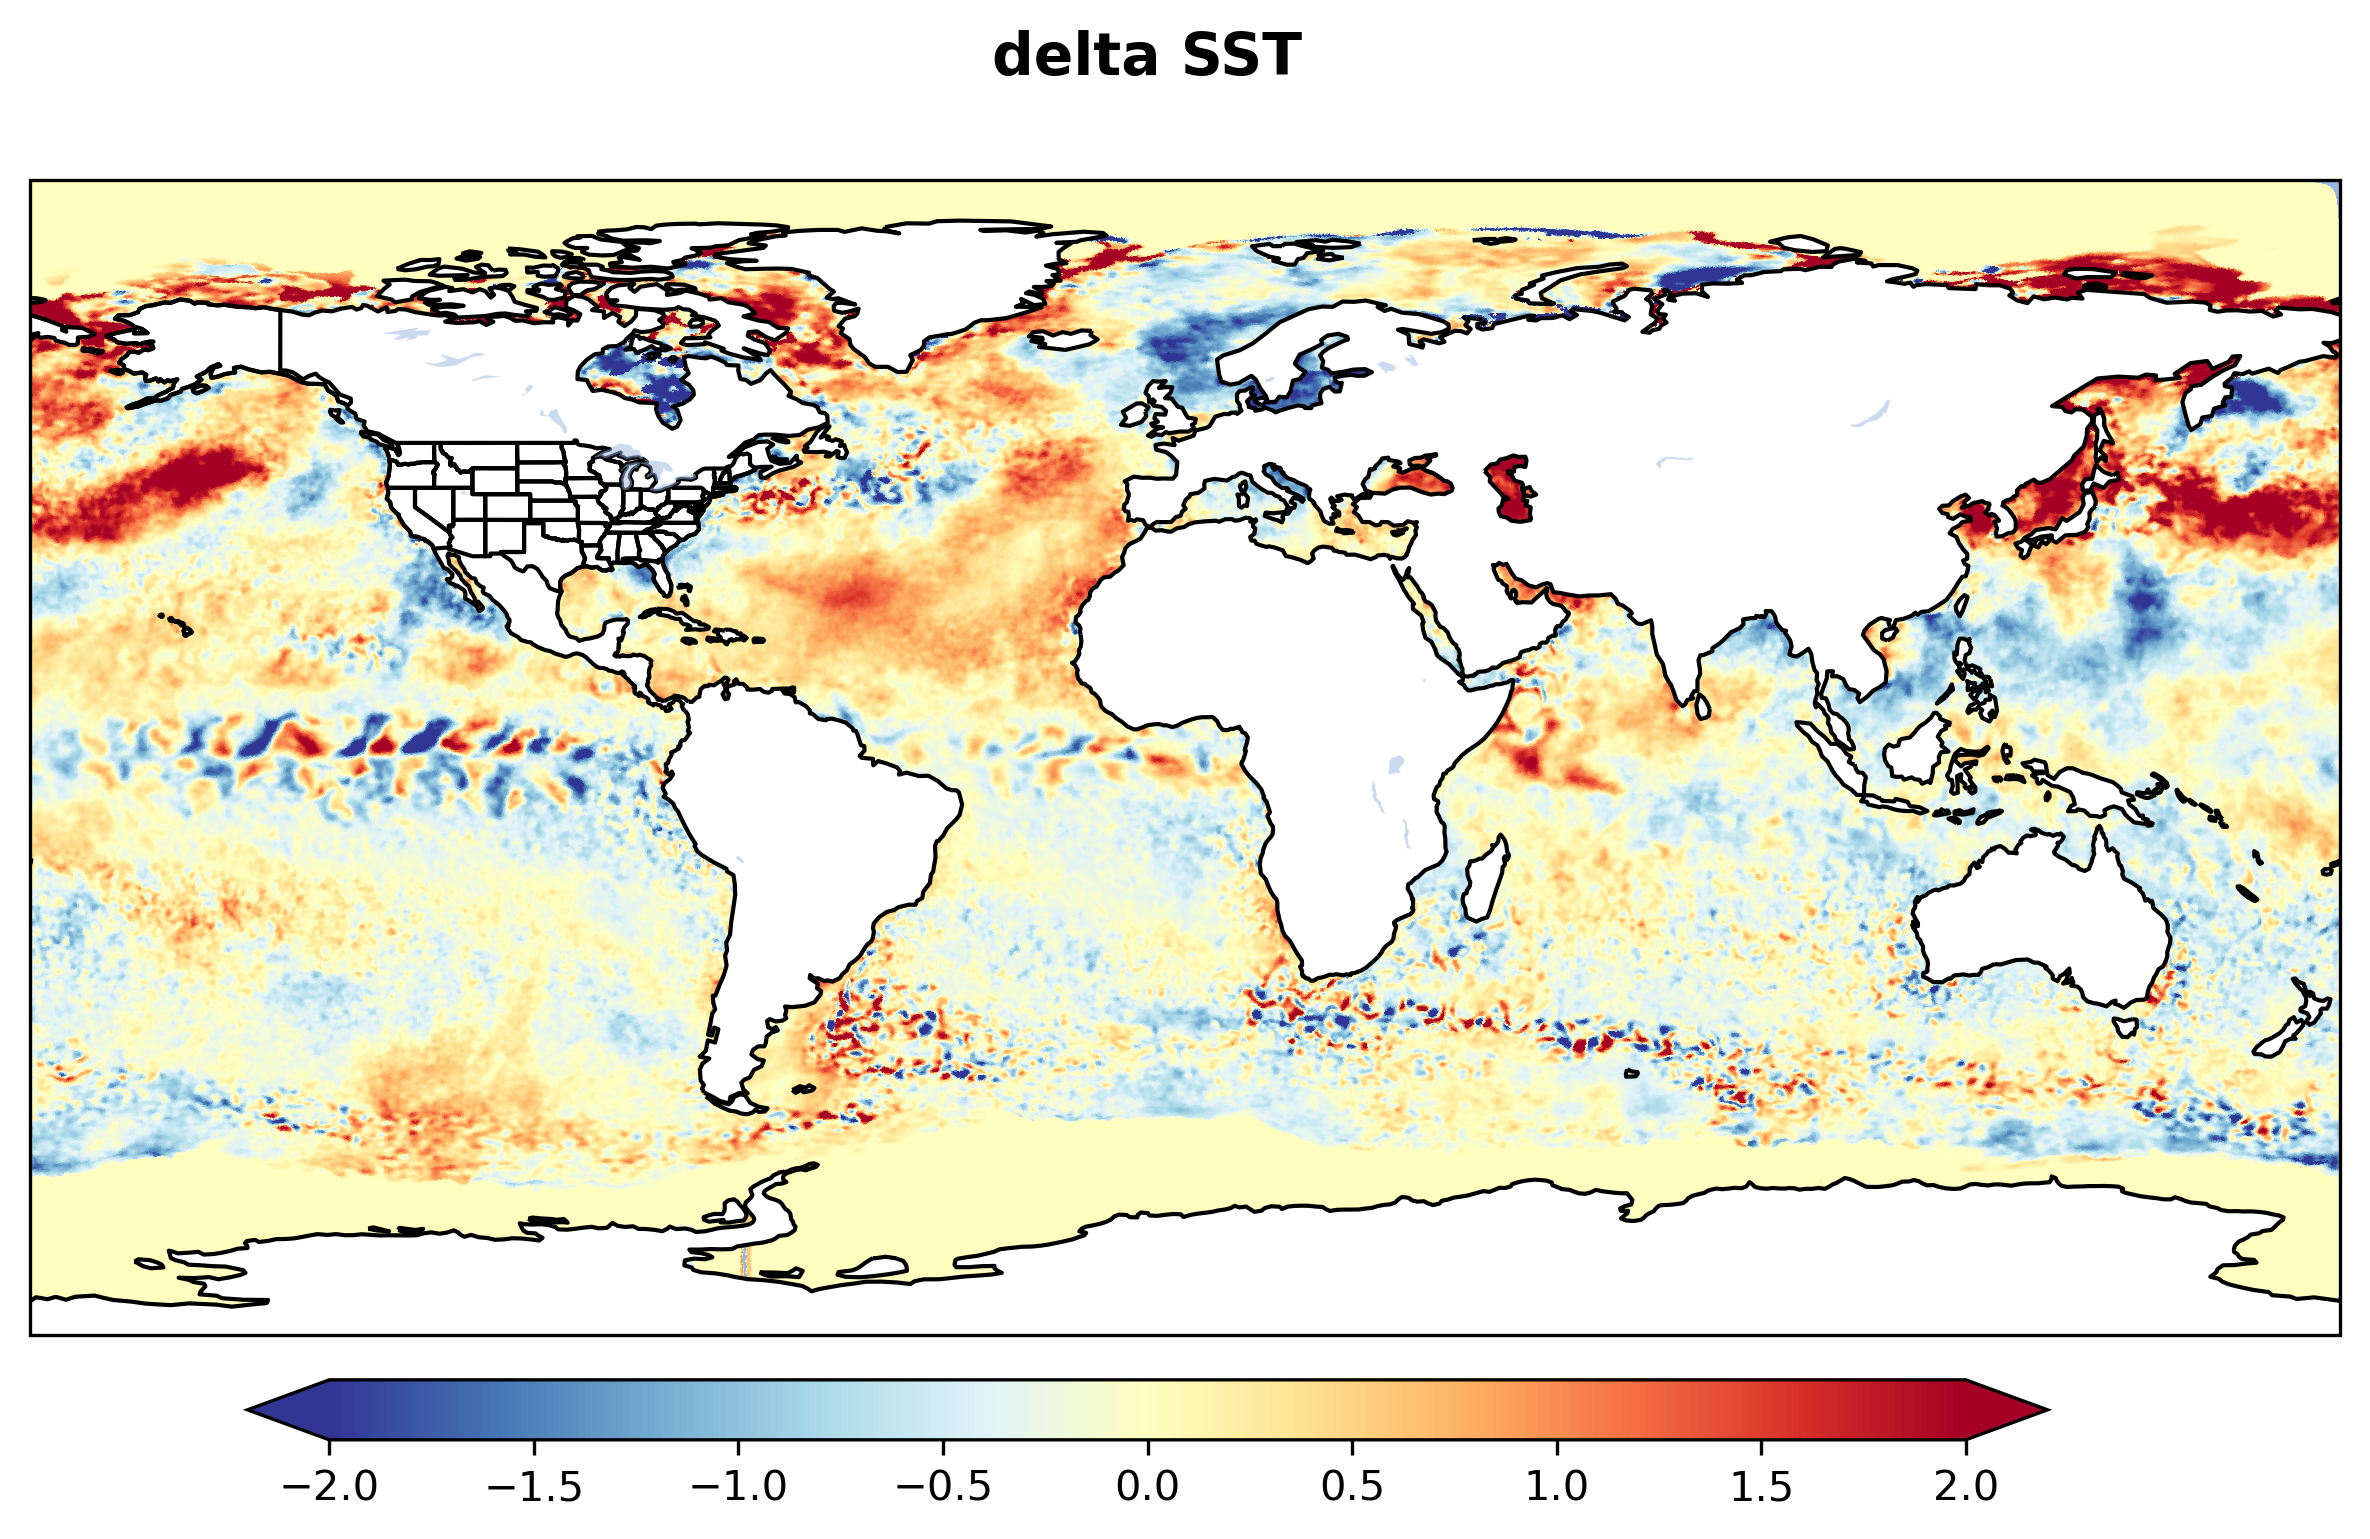

In [7]:
%%time
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=300)

ax.set_global

# Choose resolution of map features.
# Note that these features are downloaded when plotting for the first time, and for the entire globe,
#  so requesting high resolution can take several minutes.
scale = '110m' # '50m' # '10m'

ax.add_feature(cfeature.OCEAN.with_scale(scale))
ax.add_feature(cfeature.STATES.with_scale(scale))
ax.add_feature(cfeature.LAKES.with_scale(scale), alpha=0.5)
ax.add_feature(cfeature.COASTLINE.with_scale(scale))

mm = ax.tripcolor(triang, sst, edgecolors='none', 
                  transform=ccrs.PlateCarree(),
                  cmap = 'RdYlBu_r', clim = (-2,2))
# mask land
ax.add_feature(cfeature.LAND, facecolor='white', zorder=1) 

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.04, 0.6, 0.04])

# Draw the colorbar
cbar=fig.colorbar(mm, cax=cbar_ax,orientation='horizontal', extend='both')

plt.suptitle('delta SST', fontweight="bold", fontsize=14);
